Aim: Implementation of Classifying data using Non-Linear Kernels in Support Vector Machines (SVMs).

About Pulsar Star Dataset:

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the interstellar medium, and states of matter. Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve. These are summarized below:
● Mean of the integrated profile.
● Standard deviation of the integrated profile.
● Excess kurtosis of the integrated profile.
● Skewness of the integrated profile.
● Mean of the DM-SNR curve.
● Standard deviation of the DM-SNR curve.
● Excess kurtosis of the DM-SNR curve.
● Skewness of the DM-SNR curve.
● Class

**Support Vector Machine:**

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.
The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called support vectors, and hence the algorithm is termed as Support Vector Machine.

**Non - Linear SVM:**

If data is linearly arranged, then we can separate it by using a straight line, but for non-linear
data, we cannot draw a single straight line. So to separate these data points, we need to add
one more dimension. For linear data, we have used two dimensions x and y, so for non-linear
data, we will add a third dimension z. It can be calculated as:
● z=x2 +y2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

In [2]:
dataset = pd.read_csv('/content/pulsar_data_train.csv')
dataset

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


In [3]:
dataset=dataset.dropna()
dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [4]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
7,109.406250,55.912521,0.565106,0.056247,2.797659,19.496527,9.443282,97.374578,0.0


In [5]:
x = dataset.iloc[:, [2,4]]
y = dataset.iloc[:, -1]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
x_train, x_test, y_train, y_test

(        Excess kurtosis of the integrated profile   Mean of the DM-SNR curve
 7731                                     0.709628                   1.566890
 3091                                     0.084360                   2.567726
 11452                                    0.257193                   2.596990
 10631                                   -0.029067                   1.220736
 5401                                     0.181712                   2.511706
 ...                                           ...                        ...
 10669                                    0.085125                   1.689799
 12459                                    0.730128                  55.751672
 6544                                    -0.183962                   3.829431
 4382                                     0.277253                   0.954013
 3661                                     0.018395                   2.868729
 
 [6954 rows x 2 columns],
         Excess kurtosis of the inte

In [7]:
cols = x_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Fitting the SVM classifier to the training set:

In [8]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(x_train,y_train)
svclassifier

SVC(degree=8)

Predicting the test set result:

In [9]:
y_pred = svclassifier.predict(x_test)
y_pred

array([0., 0., 1., ..., 1., 0., 0.])

Creating the confusion matrix:

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[2094,   14],
       [  49,  162]])

<ipython-input-11-1dfbd24c8ad3>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)


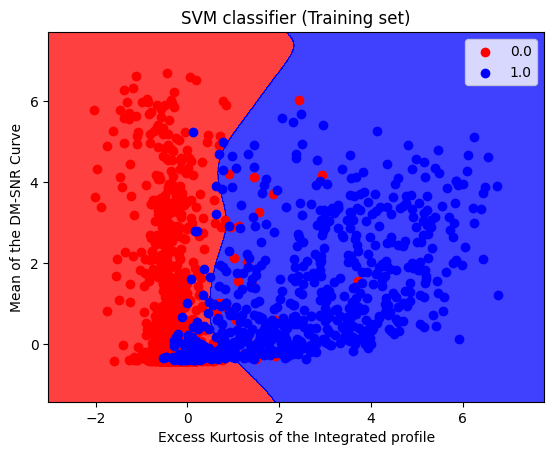

In [11]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop =
x_set[:, 0].max() + 1, step =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +
1, step = 0.01))
plt.contourf(x1, x2, svclassifier.predict(np.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)
plt.title('SVM classifier (Training set)')
plt.xlabel('Excess Kurtosis of the Integrated profile')
plt.ylabel('Mean of the DM-SNR Curve')
plt.legend()
plt.show()

Visualizing the test set result:

<ipython-input-12-a08ec9d95802>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)


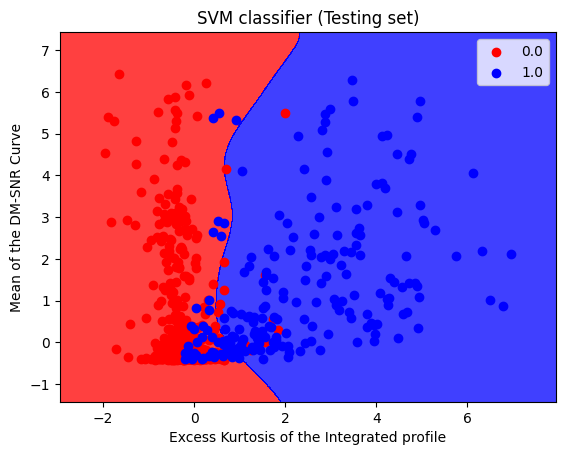

In [12]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop =
x_set[:, 0].max() + 1, step =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() +
1, step = 0.01))
plt.contourf(x1, x2, svclassifier.predict(np.array([x1.ravel(),
x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'blue'))(i), label = j)

plt.title('SVM classifier (Testing set)')
plt.xlabel('Excess Kurtosis of the Integrated profile')
plt.ylabel('Mean of the DM-SNR Curve')
plt.legend()
plt.show()

Conclusion:

From this practical I have learned the implementation of Classifying data using Non-Linear Kernels in Support Vector Machines (SVMs).